In [1]:
import networkx as nx
from operator import truediv
from scipy.sparse import csr_matrix
import math
import random
from collections import Counter
from itertools import combinations
from collections import defaultdict
from tqdm import tqdm


In [147]:
mygraph = nx.read_gml('sem3.gml',label='id')

In [10]:
e=list(mygraph.edges())
L=list(mygraph.nodes())
edge_list = list(combinations(L, 2))
R1=[l[0] for l in edge_list]
R2=[l[1] for l in edge_list]
r1 = [lis[0] for lis in e]
r2 = [lis[1] for lis in e]

In [152]:
def DegreeofN(G,l):
    F2=[]
    for i in range(len(G.nodes)):
        a=mygraph.degree[l[i]]
        F2.append(a)
    return F2
F1=DegreeofN(mygraph,L)
print(F1)

[9, 8, 4, 15, 13, 10, 11, 6, 7, 6, 10, 10, 16, 2, 16, 8, 10, 5, 8, 16, 5, 14, 17, 11, 3, 5, 18, 0, 11, 16, 8, 12, 5, 18, 15, 17, 15, 8, 10, 7, 8, 5, 2, 2, 1, 16, 20, 23, 17, 17, 5, 7, 2, 2, 6, 2, 5, 0, 0, 0, 0, 0, 0, 6, 14, 9, 12, 22, 12, 7, 12, 0, 9, 9, 6, 15, 5, 11, 10, 17, 10, 2, 27, 13, 10, 5, 13, 14, 7, 10, 0, 7, 7, 3, 0, 5, 0, 7, 5, 0, 5, 17, 15, 14, 13, 14, 7, 12, 6, 8, 0, 9, 3, 7, 11, 0, 4, 4, 4, 9, 2]


In [41]:
# Networkx appears not to implement their eigenvector centrality algorithm for MultiDiGraph objects, so you'd have to convert your object like:
G2 = nx.DiGraph(mygraph)
def Eigen_Centrality(G2):
    centrality = nx.eigenvector_centrality(G2, max_iter=1000)
    return list(centrality.values())
F4=Eigen_Centrality(G2)

In [82]:
def Betweeness(G):
    betweeness = nx.betweenness_centrality(G)
    return list(betweeness.values())
F5=Betweeness(mygraph)

In [83]:
G2 = nx.DiGraph(mygraph)
def Clustering(G):
    clustering_coeff =nx.clustering(G)
    return list(clustering_coeff.values())
F6=Clustering(G2)

Node Conductivity
Betweenness divided by Degree: which nodes can reach the most nodes in the different parts of the network faster with the least connections. Nodes with a high conductivity will tend to be better connected to the different distinct groups of nodes. They are reaching for global connections instead of the local ones. 

In [129]:
NC = []
def nodeConductivity(l):
    count=0
    for i in range(0, len(l)):
        if F1[i] == 0:
            NC.append(0)
        else:
            NC.append(F3[i]/F1[i])
        count=count+1
    return NC
F7=nodeConductivity(L)
print(len(F7))

121


Node Locality
Degree squared divided by Betweenness: Local influencers with the least global connections. Nodes with high locality measure will tend to have more connections within their local group of nodes.

In [250]:
def nodeLocality(l):
    NL=[]
    for i in range(len(l)):
        count=0
        if F1[i] == 0:
            NL.append(0)
        else:
            temp=math.sqrt(F1[i])
            NL.append(F3[i]/temp)
        count=count+1
    return NL
F8=nodeLocality(L)
print(F8)

[7.666666666666667, 7.071067811865475, 11.5, 5.680375574437544, 5.547001962252292, 7.58946638440411, 4.221158824088691, 10.61445555206044, 7.559289460184544, 10.61445555206044, 6.640783086353596, 9.803060746521975, 4.0, 23.33452377915607, 7.0, 10.960155108391486, 8.538149682454623, 9.838699100999074, 9.192388155425117, 6.5, 13.416407864998737, 5.879747322073337, 6.790997501017324, 7.53778361444409, 16.165807537309522, 11.627553482998906, 3.5355339059327378, 0, 10.251385715643963, 6.0, 10.253048327204938, 4.907477288111819, 15.205262246998569, 5.421151989096865, 8.778762251403478, 6.5484618759809905, 5.680375574437544, 9.192388155425117, 6.957010852370434, 9.827076298239907, 8.838834764831843, 8.497058314499201, 12.020815280171307, 14.849242404917497, 27.0, 7.0, 6.260990336999411, 5.838403593598094, 6.5484618759809905, 4.123105625617661, 11.180339887498947, 6.047431568147635, 14.849242404917497, 19.09188309203678, 9.38971068066885, 19.79898987322333, 6.7082039324993685, 0, 0, 0, 0, 0, 0

In [168]:
def avg(lst):
    S = sum(lst)
    l=len(lst)
    average =S/l
    return average
percent=[]
for i in range(len(L)):
    node_attributes = list(mygraph.nodes[i].values())[8:]
    del node_attributes[50]
    percent.append(avg(node_attributes))
print(percent)

[59.57142857142857, 68.57142857142857, 50.077922077922075, 59.66233766233766, 40.4025974025974, 60.311688311688314, 73.1948051948052, 60.36363636363637, 68.01298701298701, 54.96103896103896, 41.45454545454545, 69.68831168831169, 75.46753246753246, 40.12987012987013, 55.90909090909091, 43.506493506493506, 60.077922077922075, 51.44155844155844, 56.4025974025974, 62.142857142857146, 58.57142857142857, 65.79220779220779, 66.77922077922078, 52.02597402597402, 38.98701298701299, 73.23376623376623, 55.714285714285715, 59.90909090909091, 66.20779220779221, 48.25974025974026, 46.64935064935065, 55.84415584415584, 62.83116883116883, 64.27272727272727, 62.18181818181818, 67.18181818181819, 59.62337662337662, 62.76623376623377, 50.44155844155844, 67.06493506493507, 71.11688311688312, 57.87012987012987, 59.298701298701296, 48.64935064935065, 50.688311688311686, 43.01298701298701, 62.09090909090909, 42.23376623376623, 45.12987012987013, 64.36363636363636, 58.493506493506494, 27.454545454545453, 13.4

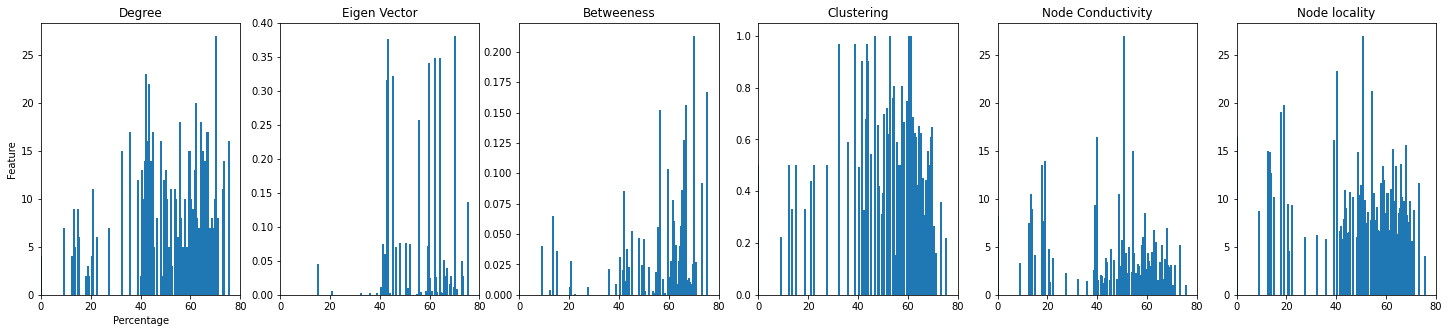

<Figure size 432x288 with 0 Axes>

In [252]:
import matplotlib.pyplot as plt
import numpy as np

# generate some data
x = percent
y1 = F1
y2 = F4
y3 = F5
y4 = F6
y5 = F7
y6 = F8

# create a figure and 5 subplots
fig, axs = plt.subplots(1, 6, figsize=(25, 5))
axs[0].bar(x, y1)
axs[1].bar(x, y2)
axs[2].bar(x, y3)
axs[3].bar(x, y4)
axs[4].bar(x, y5)
axs[5].bar(x, y6)
# Set titles and axis labels for the subplots
axs[0].set_title('Degree')
axs[1].set_title('Eigen Vector')
axs[2].set_title('Betweeness')
axs[3].set_title('Clustering')
axs[4].set_title('Node Conductivity')
axs[5].set_title('Node locality')
axs[0].set_xlabel('Percentage')
axs[0].set_ylabel('Feature')
axs[0].set_xlim(0, 80)
axs[1].set_xlim(0, 80)
axs[2].set_xlim(0, 80)
axs[3].set_xlim(0, 80)
axs[4].set_xlim(0, 80)
axs[5].set_xlim(0, 80)
# Show the plot
plt.show()


# adjust the layout
plt.tight_layout()

# show the plot
plt.show()


In [162]:
mygraph1 = nx.read_gml('sem5.gml',label='id')


In [173]:
def avg(lst):
    S = sum(lst)
    l=len(lst)
    average =S/l
    return average
percent1=[]
for i in range(len(L)):
    node_attributes = list(mygraph1.nodes[i].values())[10:]
    del node_attributes[50]
    percent1.append(avg(node_attributes))
print(percent1)

[59.96341463414634, 69.09756097560975, 50.329268292682926, 59.78048780487805, 40.78048780487805, 60.53658536585366, 73.82926829268293, 60.58536585365854, 68.54878048780488, 55.048780487804876, 42.18292682926829, 70.14634146341463, 75.97560975609755, 38.52439024390244, 56.68292682926829, 44.146341463414636, 60.68292682926829, 51.90243902439025, 56.8780487804878, 62.8780487804878, 58.6219512195122, 66.6219512195122, 67.42682926829268, 52.68292682926829, 39.19512195121951, 73.8780487804878, 56.02439024390244, 59.951219512195124, 66.63414634146342, 49.1219512195122, 47.15853658536585, 56.13414634146341, 63.292682926829265, 64.96341463414635, 62.91463414634146, 67.70731707317073, 60.390243902439025, 63.5, 51.19512195121951, 67.70731707317073, 71.53658536585365, 58.69512195121951, 59.78048780487805, 49.292682926829265, 51.0, 43.74390243902439, 62.65853658536585, 42.96341463414634, 45.28048780487805, 64.85365853658537, 59.15853658536585, 28.121951219512194, 15.390243902439025, 16.817073170731

In [217]:
def avg(lst):
    S = sum(lst)
    l=len(lst)
    average =S/l
    return average
percent2=[]
for i in range(len(L)):
    node_attributes = list(mygraph2.nodes[i].values())[5:]
    del node_attributes[50]
    percent2.append(avg(node_attributes))
print(percent2)

[59.96341463414634, 69.09756097560975, 50.329268292682926, 59.78048780487805, 40.78048780487805, 60.53658536585366, 73.82926829268293, 60.58536585365854, 68.54878048780488, 55.048780487804876, 42.18292682926829, 70.14634146341463, 75.97560975609755, 38.52439024390244, 56.68292682926829, 44.146341463414636, 60.68292682926829, 51.90243902439025, 56.8780487804878, 62.8780487804878, 58.6219512195122, 66.6219512195122, 67.42682926829268, 52.68292682926829, 39.19512195121951, 73.8780487804878, 56.02439024390244, 59.951219512195124, 66.63414634146342, 49.1219512195122, 47.15853658536585, 56.13414634146341, 63.292682926829265, 64.96341463414635, 62.91463414634146, 67.70731707317073, 60.390243902439025, 63.5, 51.19512195121951, 67.70731707317073, 71.53658536585365, 58.69512195121951, 59.78048780487805, 49.292682926829265, 51.0, 43.74390243902439, 62.65853658536585, 42.96341463414634, 45.28048780487805, 64.85365853658537, 59.15853658536585, 28.121951219512194, 15.390243902439025, 16.817073170731

In [207]:
mygraph2 = nx.read_gml('sem7.gml',label='id')


In [211]:
Sem3count =[]
for i in tqdm(range(len(L))):
    G1 = nx.ego_graph(mygraph, L[i], radius=1, center=True, undirected=False, distance=None)
    count = 0  # initialize count outside the inner loop
    for node in G1.nodes():
        if mygraph.nodes[L[i]]['Section'] == G1.nodes[node]['Section']:
            count += 1
    Sem3count.append(count)
print(Sem3count)




100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 905.02it/s]

[5, 5, 3, 5, 7, 5, 6, 4, 5, 5, 6, 6, 5, 2, 6, 5, 6, 4, 3, 6, 5, 9, 8, 7, 3, 3, 8, 1, 7, 7, 5, 7, 3, 7, 9, 7, 6, 5, 6, 6, 5, 5, 2, 2, 1, 6, 9, 9, 6, 6, 3, 7, 2, 2, 6, 3, 5, 1, 1, 1, 1, 1, 1, 5, 3, 5, 3, 2, 7, 6, 5, 1, 3, 5, 3, 8, 4, 7, 7, 8, 7, 2, 2, 7, 7, 3, 6, 7, 5, 6, 1, 5, 5, 3, 1, 4, 1, 5, 4, 1, 5, 8, 7, 8, 7, 8, 5, 8, 4, 4, 1, 4, 4, 4, 6, 1, 3, 4, 3, 6, 2]


In [214]:
Sem5count =[]
L1=list(mygraph1.nodes())
for i in tqdm(range(len(L1))):
    G1 = nx.ego_graph(mygraph1, L1[i], radius=1, center=True, undirected=False, distance=None)
    count = 0  # initialize count outside the inner loop
    for node in G1.nodes():
        if mygraph1.nodes[L1[i]]['Section'] == G1.nodes[node]['Section']:
            count += 1
    Sem5count.append(count)
print(Sem5count)

100%|██████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 1670.98it/s]

[5, 5, 3, 5, 7, 5, 6, 5, 5, 5, 6, 6, 5, 2, 6, 5, 6, 4, 3, 6, 5, 9, 8, 7, 3, 3, 8, 1, 7, 7, 5, 7, 3, 7, 9, 7, 6, 5, 6, 6, 5, 5, 2, 2, 1, 6, 9, 9, 6, 6, 3, 7, 2, 2, 6, 3, 5, 1, 1, 1, 1, 1, 1, 5, 3, 5, 3, 2, 7, 6, 5, 1, 3, 5, 3, 8, 4, 7, 7, 8, 7, 2, 2, 7, 7, 3, 6, 7, 5, 6, 1, 5, 5, 3, 1, 4, 1, 5, 4, 1, 5, 8, 7, 8, 7, 8, 5, 8, 4, 4, 1, 4, 4, 4, 6, 1, 3, 4, 3, 6, 2, 1, 1, 1, 1, 1, 1, 1]


In [213]:
Sem7count =[]
L2=list(mygraph2.nodes())

for i in tqdm(range(len(L2))):
    G1 = nx.ego_graph(mygraph2, L2[i], radius=1, center=True, undirected=False, distance=None)
    count = 0  # initialize count outside the inner loop
    for node in G1.nodes():
        if mygraph2.nodes[L2[i]]['Section'] == G1.nodes[node]['Section']:
            count += 1
    Sem7count.append(count)
print(Sem7count)

100%|██████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 1227.54it/s]

[5, 6, 5, 4, 6, 5, 6, 5, 4, 4, 6, 7, 8, 1, 7, 6, 8, 6, 5, 5, 8, 8, 7, 9, 1, 7, 10, 5, 8, 8, 6, 5, 4, 8, 7, 10, 9, 6, 7, 7, 6, 8, 3, 2, 5, 6, 7, 7, 7, 6, 5, 7, 1, 1, 8, 4, 4, 1, 4, 4, 3, 1, 1, 7, 4, 6, 6, 4, 8, 6, 5, 7, 7, 6, 7, 7, 7, 9, 9, 7, 6, 7, 5, 9, 9, 8, 9, 7, 8, 6, 5, 6, 7, 7, 6, 5, 5, 10, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 4, 8, 7, 7, 6, 4, 4, 7, 4, 10, 6, 8, 6, 1, 4, 1, 1, 1, 1, 1]


In [1]:
Sec=[]
for i in range(len(percent)):
    if(percent[i]<percent2[i] or percent[i]>percent2[i]):
        Sec.append(1)
    else:
        Sec.append(0)
print(Sec)

NameError: name 'percent' is not defined

In [240]:
FinalCount =[Sec.count(1),Sec.count(0)]

In [241]:
print(FinalCount)

[75, 46]


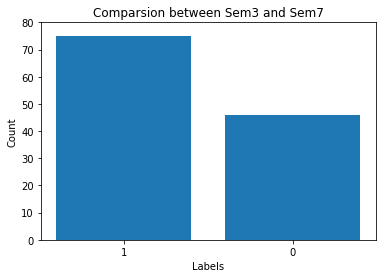

In [242]:
from matplotlib import pyplot
labels = ['1', '0']
pyplot.bar(labels, FinalCount)
pyplot.xlabel("Labels")
pyplot.ylabel("Count")
pyplot.ylim(0, 80)
pyplot.title("Comparsion between Sem3 and Sem7")

# Show the plot
pyplot.show()
